In [1]:
from numpy import linspace,arange,array, log,exp,sin,cos,sqrt, pi,e, zeros, ones
import numpy as np
from scipy.optimize import newton, brentq

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.
https://docs.scipy.org/doc/scipy/tutorial/general.html

Documentation:
 Brentq
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html
 
 Newton
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html
 
 or help(newton) 

In [2]:
# Define a few functions to try

def cubic(x):
    y = (x+1) * (x-3) * (x+10) - 2
    return y
    
def quad(x):
    y = (x+1)*(x-3)
    return y

def wave(x):
    y = sin(x) + x/4
    return y

A home made Bisect code. Bisect and Brent1 are similar methods. Both require 2 initial guesses that bracket the root. That is, we enter $x_1$ and $x_2$ such that the root, $x_r$, is between $x_1$ and $x_2$. Assuming $x_1<x_2$, then $x_1 \le x_r \le x_2$. 

If $x_1$ and $x_2$ bracket the root of $f(x)$, then $f(x_1)$ and $f(x_2)$ have opposite sign, or $f(x_1) \times f(x_2)<0$

In [7]:
def bisect(f,x1,x2):
    """
    Solve a function using bisection

    Parameters
    ----------
    f : functions to find root
    x1,x2: Values to bracket root

    Returns
    -------
    x : root
    
    As written, the code will just cycle imax times and return
    Ideally, add code to check if the solution is found earlier

    """
    from sys import exit
    from numpy import abs
    
    imax = 100 # how many times to try
    tol = 1e-12 # tolerance for finding the root
    
    # Add logic here to check if root is really bracketed by x1,x2
    # Add logic here to check if x1 or x2 is actually a root of f(x)

    for i in range(imax):
        x = (x1+x2)/2
        
        # Add logic here to check if x is the root (or within some tolerance)
        if f(x)< tol: exit

        if f(x)*f(x1)>0:
            x1=x
        else:
            x2=x

    return x
            
    x = (x1+x2)/2 # final estimate
    
    return x0


Plot the cubic function

Text(0.5, 1.0, 'y = (x+1) * (x-3) * (x+10) - 2')

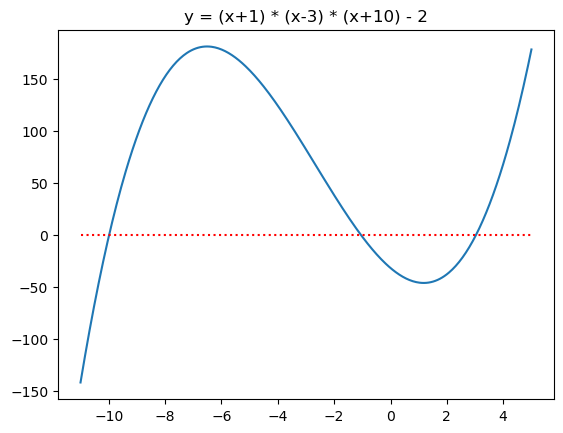

In [8]:
from matplotlib.pyplot import plot, title
x=linspace(-11,5,400)
plot(x,cubic(x))
plot(x,0*x,':r') # zero line
title('y = (x+1) * (x-3) * (x+10) - 2')

In [12]:
# Solve the quadratic 3 ways

x = bisect(cubic,-100, -5)

print("Bisection")
print("Solution: ", x)
print("Error: ", quad(x))

x = brentq(cubic,-100,-5)

print("\nBrentq") # \n for newline
print("Solution: ", x)
print("Error: ", quad(x))


x = newton(cubic,-10)

print("\nNewton")
print("Solution: ", x)
print("Error: ", quad(x))

Bisection
Solution:  -9.98285072560763
Error:  116.62301006098005

Brentq
Solution:  -9.982850725607628
Error:  116.62301006098001

Newton
Solution:  -9.98285072560763
Error:  116.62301006098005


In [13]:
# Compare how fast

print('\n\nTiming:')
import time
start=time.time()
newton(cubic,-10)
end=time.time()
print ('newton method takes ',(end-start)*1e3, 'msec')

start=time.time()
brentq(cubic,-100,-5)
end=time.time()
print ('brenq method takes ',(end-start)*1e3, 'msec')

start=time.time()
bisect(cubic,-100,-5)
end=time.time()
print ('bisect method takes ',(end-start)*1e3, 'msec')




Timing:
newton method takes  0.23126602172851562 msec
brenq method takes  0.048160552978515625 msec
bisect method takes  0.09608268737792969 msec
